# Emulating using GPs


In [1]:
import os
## Ignore my broken HDF5 install...
os.putenv("HDF5_DISABLE_VERSION_CHECK", '1')

In [2]:
import iris
from utils import get_bc_ppe_data

from esem import gp_model
from esem.utils import get_random_params

import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\h5py\__init__.py:40: UserWarning: h5py is running against HDF5 1.10.6 when it was built against 1.10.5, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


## Read in the parameters and observables

In [4]:
ppe_params, ppe_aaod = get_bc_ppe_data()

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\__init__.py:249: IrisDeprecation: setting the 'Future' property 'netcdf_promote' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\__init__.py:249: IrisDeprecation: setting the 'Future' property 'netcdf_promote' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))


In [5]:
n_test = 5

X_test, X_train = ppe_params[:n_test], ppe_params[n_test:]
Y_test, Y_train = ppe_aaod[:n_test,0], ppe_aaod[n_test:,0]

## Setup and run the models

In [9]:
model = gp_model(X_train, Y_train)

In [15]:
model.train()

In [16]:
m, v = model.predict(X_test.values)

In [17]:
## validation_plot(Y_test.data.flatten(), m.data.flatten(), v.data.flatten())

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'sample'.
  warnings.warn(msg.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'job'.
  warnings.warn(msg.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


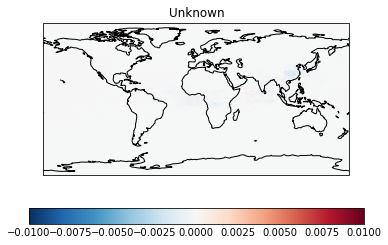

In [18]:
qplt.pcolormesh((m.collapsed('sample', iris.analysis.MEAN)-Y_test.collapsed('job', iris.analysis.MEAN)), cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.gca().coastlines()

In [19]:
## Note the model variance is constant across the outputs
v.data.max()

1.175408691451335e-06

In [15]:
get_random_params(3, int(1e5)).shape

(100000, 3)

In [16]:
m, sd = model.batch_stats(get_random_params(3, int(1e3)))

100%|##########| 1000/1000 [00:09<00:00, 149.00sample/s]

In [17]:
m, sd = model.batch_stats(get_random_params(3, int(1e4)), batch_size=10)

100%|##########| 10000/10000 [00:07<00:00, 1459.07sample/s]

In [19]:
m, sd = model.batch_stats(get_random_params(3, int(1e6)), batch_size=10000)

100%|##########| 1000000/1000000 [00:09<00:00, 122569.61sample/s]